# Setup

In [1]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Load data

In [2]:
cifar = tf.keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar.load_data()

In [3]:
X_train_full.shape

(50000, 32, 32, 3)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [6]:
X_train.shape

(45000, 32, 32, 3)

In [7]:
X_valid.shape

(5000, 32, 32, 3)

In [8]:
X_test.shape

(10000, 32, 32, 3)

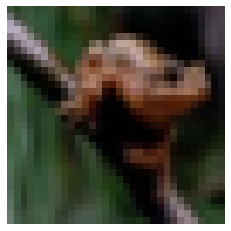

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [10]:
y_train

array([[6],
       [7],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [12]:
class_names[y_train[0][0]]

'frog'

# Standardize data

In [13]:
pixel_means = X_train.mean(axis=0)
pixel_means.shape

(32, 32, 3)

In [14]:
pixel_stds = X_train.std(axis=0)
pixel_stds.shape

(32, 32, 3)

In [15]:
X_train_standardized = (X_train - pixel_means) / pixel_stds

X_valid_standardized = (X_valid - X_valid.mean(axis=0)) / X_valid.std(axis=0)
X_test_standardized = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

In [16]:
X_train_standardized.mean(axis=0)

array([[[-1.26346538e-14,  3.83544900e-14, -1.45948340e-14],
        [ 2.16892529e-14,  3.88299911e-14,  2.69281881e-14],
        [ 3.47678923e-15,  4.16193598e-14,  3.18685522e-14],
        ...,
        [ 1.76495559e-14,  6.61919458e-14,  2.21680353e-14],
        [ 1.66235371e-14,  4.96447476e-14,  3.16723191e-14],
        [ 5.35746262e-15,  4.45144613e-14,  1.94159799e-14]],

       [[-1.99349722e-14, -3.55779603e-15,  4.97943415e-15],
        [ 8.87647980e-15,  5.65033699e-14,  3.09045777e-14],
        [-5.48222702e-15,  5.33282455e-14,  1.60781906e-14],
        ...,
        [ 1.28854458e-15,  1.69432073e-14,  1.56435655e-14],
        [-5.75694554e-15,  1.82706147e-14, -1.09884447e-15],
        [-4.67727092e-15,  2.91203851e-14,  1.43271271e-14]],

       [[-2.38230916e-14,  2.39115740e-14,  1.65502476e-14],
        [ 1.54112772e-15,  5.32304225e-14,  3.12234189e-16],
        [ 1.71493387e-14,  4.50213447e-14,  7.41992640e-15],
        ...,
        [-1.77874505e-15,  4.72152293e-14,

In [17]:
X_train_standardized.std(axis=0)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

# Sequential API

In [18]:
model = keras.models.Sequential()

#Input layer
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))

#Hidden layers
for layer in range(3):
    model.add(keras.layers.Dense(100, activation = "selu", kernel_initializer = "lecun_normal"))
    
#Alpha dropout in the last hidden layer
model.add(keras.layers.AlphaDropout(rate = 0.2))

#Output layer
model.add(keras.layers.Dense(10, activation = "softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 alpha_dropout (AlphaDropout  (None, 100)              0         
 )                                                               
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                        

In [20]:
hidden = model.layers[1]
hidden.name

'dense'

In [21]:
weights, biases = hidden.get_weights()

In [22]:
weights

array([[ 0.00671678, -0.01728328,  0.00655197, ..., -0.030162  ,
         0.00874497, -0.00052549],
       [-0.0095356 ,  0.02286839,  0.01445476, ..., -0.01182996,
         0.01502507, -0.00780757],
       [-0.02250803, -0.02772374,  0.01912522, ...,  0.00997402,
        -0.01888504, -0.01395407],
       ...,
       [ 0.00886546,  0.02832981, -0.02443673, ..., -0.00851937,
         0.00901785,  0.01717158],
       [ 0.02430505, -0.00809324,  0.00285417, ...,  0.03608255,
         0.01105349, -0.00426256],
       [-0.00627153, -0.00838418, -0.01814006, ..., -0.02184197,
         0.03904115,  0.00939984]], dtype=float32)

In [23]:
weights.shape

(3072, 100)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [25]:
biases.shape

(100,)

# Compile

In [26]:
from keras import optimizers
#Using momentum optimization of 0.9 (should be between 0 and 1, 0.9 best in practice)
model.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.SGD(momentum=0.9),metrics=["accuracy"])

In [27]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(patience = 5, restore_best_weights=True, monitor="accuracy", min_delta=0.001, mode="max")
lr = ReduceLROnPlateau(factor=0.5, patience=4)

# Training

In [28]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_valid, y_valid), callbacks=[es, lr])

Epoch 1/30
1407/1407 [==============================] - 5s 2ms/step - loss: 1.9766 - accuracy: 0.2824 - val_loss: 1.9160 - val_accuracy: 0.3512 - lr: 0.0100
Epoch 2/30
1407/1407 [==============================] - 3s 2ms/step - loss: 1.7842 - accuracy: 0.3590 - val_loss: 1.8254 - val_accuracy: 0.3716 - lr: 0.0100
Epoch 3/30
1407/1407 [==============================] - 3s 2ms/step - loss: 1.7013 - accuracy: 0.3902 - val_loss: 1.7723 - val_accuracy: 0.3946 - lr: 0.0100
Epoch 4/30
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6547 - accuracy: 0.4074 - val_loss: 1.8125 - val_accuracy: 0.4086 - lr: 0.0100
Epoch 5/30
1407/1407 [==============================] - 3s 2ms/step - loss: 1.6087 - accuracy: 0.4194 - val_loss: 1.6697 - val_accuracy: 0.4394 - lr: 0.0100
Epoch 6/30
1407/1407 [==============================] - 3s 2ms/step - loss: 1.5782 - accuracy: 0.4328 - val_loss: 1.6001 - val_accuracy: 0.4468 - lr: 0.0100
Epoch 7/30
1407/1407 [==============================] - 3s

In [29]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1407}

In [30]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

pd.DataFrame(history.history).plot(figsize=(8,5))

# Evaluation

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5107 - accuracy: 0.5438


[1.5107349157333374, 0.5437999963760376]

In [33]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.01, 0.04, 0.13, 0.42, 0.27, 0.06, 0.  , 0.  , 0.05, 0.01],
       [0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.38],
       [0.25, 0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.09]],
      dtype=float32)

In [34]:
y_new = y_test[:3]
y_new

array([[3],
       [8],
       [8]], dtype=uint8)

In [35]:
np.array(class_names)[y_new]

array([['cat'],
       ['ship'],
       ['ship']], dtype='<U10')

# Hypertuning model parameters

In [36]:
# Create a function that will build and compile a Keras model.
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[32, 32, 3]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10, activation = "softmax"))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
    return model

In [37]:
# Wrap the Keras model in a Scikit-Learn KerasRegressor.
keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_model)

C:\Users\CSnit\AppData\Local\Temp\ipykernel_28464\162082958.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter sets and ranges to explore
param_distribs = {
    "n_hidden": [2, 4, 7, 10],
    "n_neurons": [100, 200, 300, 400, 500]
}
                      
# Create an instance of RandomizedSearchCV
rnd_search_cv = RandomizedSearchCV(keras_classifier, param_distribs, n_iter=10, cv=3, n_jobs=-1, verbose=2)

# Search
rnd_search_cv.fit(X_train, y_train, epochs=30,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


D:\Python\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
D:\Python\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/30
1407/1407 [==============================] - 3s 2ms/step - loss: 2.0182 - val_loss: 1.8810
Epoch 2/30
1407/1407 [==============================] - 2s 2ms/step - loss: 1.8469 - val_loss: 1.8499
Epoch 3/30
1407/1407 [==============================] - 2s 2ms/step - loss: 1.7792 - val_loss: 1.7613
Epoch 4/30
1407/1407 [==============================] - 2s 2ms/step - loss: 1.7304 - val_loss: 1.7598
Epoch 5/30
1407/1407 [==============================] - 2s 2ms/step - loss: 1.6910 - val_loss: 1.7194
Epoch 6/30
1407/1407 [==============================] - 2s 2ms/step - loss: 1.6581 - val_loss: 1.6569
Epoch 7/30
1407/1407 [==============================] - 2s 2ms/step - loss: 1.6282 - val_loss: 1.6536
Epoch 8/30
1407/1407 [==============================] - 2s 2ms/step - loss: 1.6028 - val_loss: 1.6009
Epoch 9/30
1407/1407 [==============================] - 2s 2ms/step - loss: 1.5809 - val_loss: 1.5878
Epoch 10/30
1407/1407 [==============================] - 2s 2ms/step - loss: 1.560

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000154ABA73820>,
                   n_jobs=-1,
                   param_distributions={'n_hidden': [2, 4, 7, 10],
                                        'n_neurons': [100, 200, 300, 400, 500]},
                   verbose=2)

In [39]:
rnd_search_cv.best_params_

{'n_neurons': 100, 'n_hidden': 2}

In [57]:
rnd_search_model = rnd_search_cv.best_estimator_.model
rnd_search_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.5178


1.5178385972976685